In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# --- 1. Load and Initial Data Exploration ---
print("### 1. Load and Initial Data Exploration")
URL="https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(URL)
print("First 5 rows of the DataFrame:")
print(df.head())
print("\nData types of all attributes:")
print(df.info())
print("\nBasic statistics for numerical attributes:")
print(df.describe())

### 1. Load and Initial Data Exploration
First 5 rows of the DataFrame:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Da


### 2. Distribution of Median House Value


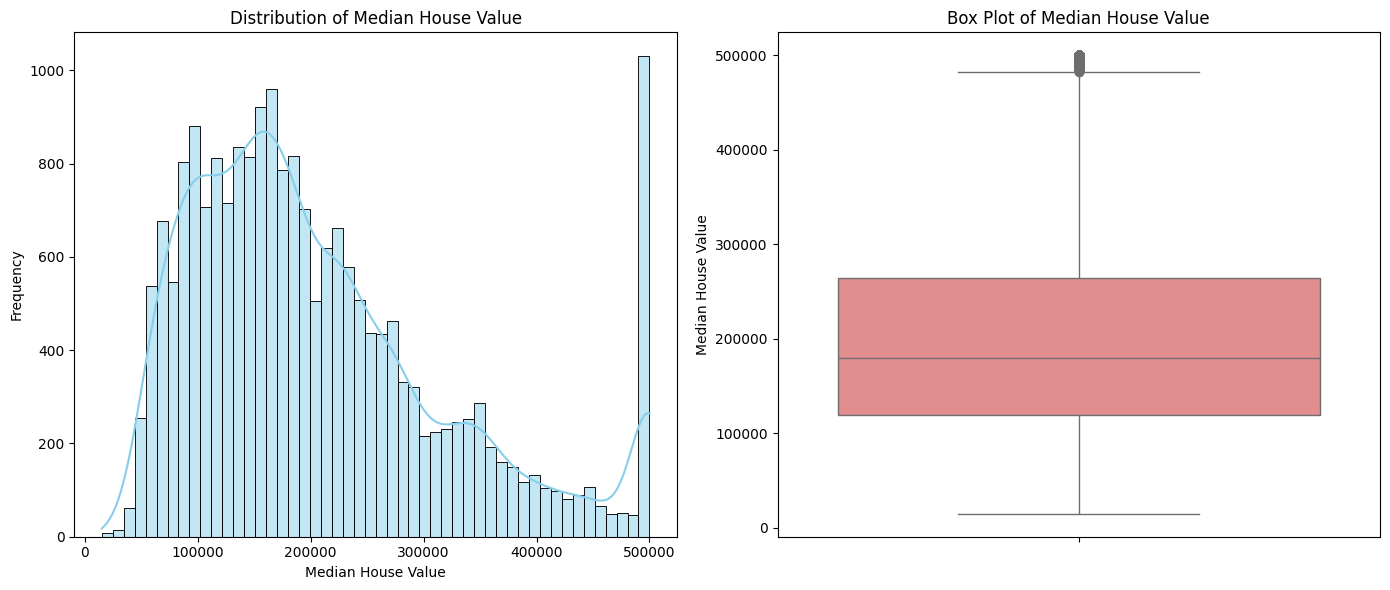

In [ ]:
# --- 2. Analyze Target Variable Distribution ---
print("\n### 2. Distribution of Median House Value")
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['median_house_value'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.boxplot(y=df['median_house_value'], color='lightcoral')
plt.title('Box Plot of Median House Value')
plt.ylabel('Median House Value')
plt.tight_layout()
plt.show()

In [ ]:
# --- 3. Identify and Handle Missing Values ---
print("\n### 3. Handling Missing Values")
missing_values_count = df.isnull().sum()
print("Number of missing values per column (only showing columns with missing values):")
print(missing_values_count[missing_values_count > 0])
median_total_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'] = df['total_bedrooms'].fillna(median_total_bedrooms)
print(f"\nMissing values in total_bedrooms after imputation: {df['total_bedrooms'].isnull().sum()}")


### 3. Handling Missing Values
Number of missing values per column (only showing columns with missing values):
total_bedrooms    207
dtype: int64

Missing values in total_bedrooms after imputation: 0


In [ ]:
# --- 4. Feature Encoding and Scaling (MinMax) ---
print("\n### 4. Feature Encoding and MinMax Scaling")
categorical_cols = ['ocean_proximity']
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols.remove('median_house_value')
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)
scaler_minmax = MinMaxScaler(feature_range=(0, 1))
df_encoded[numerical_cols] = scaler_minmax.fit_transform(df_encoded[numerical_cols])
print("DataFrame head after One-Hot Encoding and MinMax Scaling (numerical columns):")
print(df_encoded[numerical_cols].head())


### 4. Feature Encoding and MinMax Scaling
DataFrame head after One-Hot Encoding and MinMax Scaling (numerical columns):
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   0.211155  0.567481            0.784314     0.022331        0.019863   
1   0.212151  0.565356            0.392157     0.180503        0.171477   
2   0.210159  0.564293            1.000000     0.037260        0.029330   
3   0.209163  0.564293            1.000000     0.032352        0.036313   
4   0.209163  0.564293            1.000000     0.041330        0.043296   

   population  households  median_income  
0    0.008941    0.020556       0.539668  
1    0.067210    0.186976       0.538027  
2    0.013818    0.028943       0.466028  
3    0.015555    0.035849       0.354699  
4    0.015752    0.042427       0.230776  


In [ ]:
# --- 5. Stratified Data Splitting ---
print("\n### 5. Stratified Data Splitting")
df_encoded['income_cat'] = np.ceil(df_encoded['median_income'] / 1.5)
df_encoded['income_cat'] = df_encoded['income_cat'].where(df_encoded['income_cat'] < 5, 5.0)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_encoded, df_encoded['income_cat']):
    strat_train_set = df_encoded.loc[train_index]
    strat_test_set = df_encoded.loc[test_index]
strat_train_set.drop('income_cat', axis=1, inplace=True)
strat_test_set.drop('income_cat', axis=1, inplace=True)
print(f"Shape of stratified training set: {strat_train_set.shape}")
print(f"Shape of stratified testing set: {strat_test_set.shape}")


### 5. Stratified Data Splitting
Shape of stratified training set: (16512, 14)
Shape of stratified testing set: (4128, 14)



### 6. Correlation Matrix Analysis


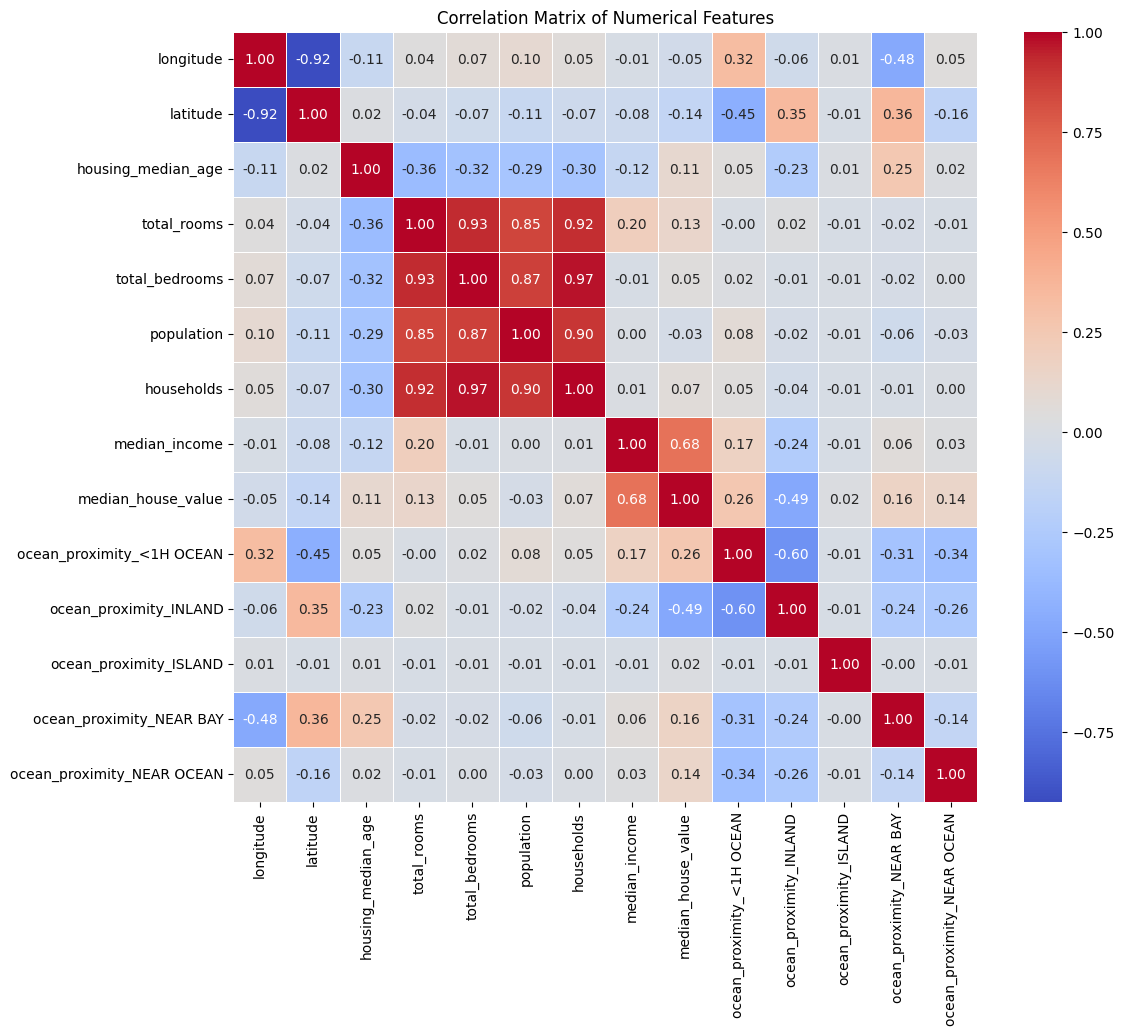

Top 3 features most positively correlated with median_house_value:
median_income                0.684522
ocean_proximity_<1H OCEAN    0.257341
ocean_proximity_NEAR BAY     0.163476
Name: median_house_value, dtype: float64

Most negatively correlated feature with median_house_value:
ocean_proximity_INLAND   -0.486256
Name: median_house_value, dtype: float64


In [ ]:
# --- 6. Correlation Matrix Analysis ---
print("\n### 6. Correlation Matrix Analysis")
correlation_matrix = strat_train_set.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
median_house_value_correlations = correlation_matrix['median_house_value'].sort_values(ascending=False)
print("Top 3 features most positively correlated with median_house_value:")
print(median_house_value_correlations[1:4])
print("\nMost negatively correlated feature with median_house_value:")
print(median_house_value_correlations.tail(1))


### 7. Scatter Plot: Median Income vs. Median House Value


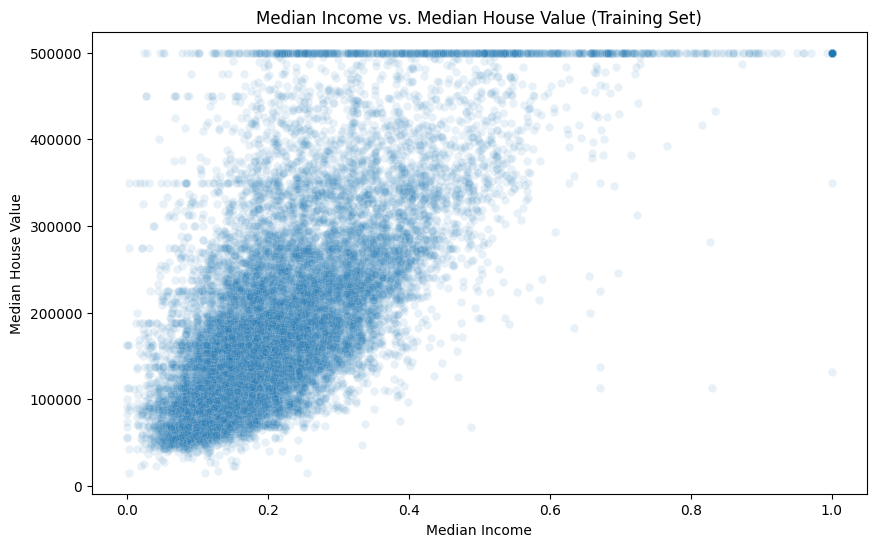

In [ ]:
# --- 7. Scatter Plot of Income vs. House Value ---
print("\n### 7. Scatter Plot: Median Income vs. Median House Value")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=strat_train_set, x='median_income', y='median_house_value', alpha=0.1)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Median Income vs. Median House Value (Training Set)')
plt.show()

In [ ]:
# --- 8. Random Data Splitting and Standard Scaling ---
print("\n### 8. Random Data Splitting and Standard Scaling")
X = df_encoded.drop('median_house_value', axis=1)
y = df_encoded['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numerical_cols_for_scaling_standard = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler_standard = StandardScaler()
X_train[numerical_cols_for_scaling_standard] = scaler_standard.fit_transform(X_train[numerical_cols_for_scaling_standard])
X_test[numerical_cols_for_scaling_standard] = scaler_standard.transform(X_test[numerical_cols_for_scaling_standard])
print("First 5 rows of X_train after random split and standard scaling:")
print(X_train.head())



### 8. Random Data Splitting and Standard Scaling
First 5 rows of X_train after random split and standard scaling:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196   1.272587 -1.372811            0.348490     0.222569        0.211228   
8267    0.709162 -0.876696            1.618118     0.340293        0.593094   
17445  -0.447603 -0.460146           -1.952710    -0.342597       -0.495226   
14265   1.232698 -1.382172            0.586545    -0.561490       -0.409306   
2271   -0.108551  0.532084            1.142008    -0.119565       -0.256559   

       population  households  median_income  ocean_proximity_<1H OCEAN  \
14196    0.768276    0.322906      -0.326196                      False   
8267    -0.098901    0.672027      -0.035843                      False   
17445   -0.449818   -0.430461       0.144701                      False   
14265   -0.007434   -0.380587      -1.017864                      False   
2271    -0.485877   -0.314962     

In [ ]:
# --- 9. Train and Evaluate Linear Regression Model ---
print("\n### 9. Linear Regression Model Performance")
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nLinear Regression Model Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R2 Score: {r2:.2f}")



### 9. Linear Regression Model Performance

Linear Regression Model Performance:
Root Mean Squared Error (RMSE): 69926.19
Mean Absolute Error (MAE): 50626.39
R2 Score: 0.63
